# Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Spotify API Configuration with Spotipy

In [5]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import cred

scope = "user-read-recently-played"

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=cred.client_ID, client_secret=cred.client_SECRET, redirect_uri=cred.redirect_url, scope=scope))

# results = sp.current_user_recently_played()
# for idx, item in enumerate(results['items']):
#     track = item['track']
#     print(idx, track['artists'][0]['name'], " – ", track['name'])

In [6]:
def analyze_playlist(creator, playlist_id):
    
    # Create empty dataframe
    playlist_features_list = ["artist","album","track_name",  "track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

In [7]:
vibes_to_reset = analyze_playlist('Matthew Lim','30cdY3LXb1nZBdTY05wEXj')
vibes_to_reset.head()
# csv
# df.to_csv("dataframe.csv", index = False)

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Mac Ayres,Drive Slow,Easy,58dSdjfEYNSxte1aNVxuNf,0.722,0.282,5,-7.484,1,0.106,0.00557,0.147,0.217,91.367,314358,4
1,Daniel Caesar,Freudian,Best Part (feat. H.E.R.),1RMJOxR6GRPsBHL8qeC2ux,0.524,0.364,7,-10.209,1,0.0367,0,0.1,0.436,75.24,209831,4
2,Bruno Major,A Song For Every Moon,Easily,2k9N4caeCIJLOWwWwssrEM,0.772,0.256,7,-8.545,0,0.0481,0.00612,0.144,0.357,118.902,210240,3
3,keshi,skeletons,skeletons,2BuJrxYKhYky20dQqTlobO,0.719,0.265,2,-12.782,1,0.0754,0.0865,0.108,0.273,80.021,152480,4
4,Kendrick Lamar,DAMN.,LOVE. FEAT. ZACARI.,6PGoSes0D9eUDeeAafB2As,0.8,0.585,10,-7.343,1,0.0924,0,0.153,0.779,126.058,213400,4


## Playlists Classified as 'Happy'

In [8]:
mood_booster = analyze_playlist('spotify','37i9dQZF1DX3rxVfibe1L0')
mood_booster.to_csv("mood_booster.csv", index = False)

In [9]:
great_day = analyze_playlist('spotify','37i9dQZF1DX7KNKjOK0o75')
great_day.to_csv("great_day.csv", index = False)

In [10]:
good_vibes = analyze_playlist('spotify','37i9dQZF1DWYBO1MoTDhZI')
good_vibes.to_csv("good_vibes.csv", index = False)

In [11]:
happy = pd.concat([mood_booster,great_day,good_vibes],ignore_index=True)
happy.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Post Malone,Twelve Carat Toothache,I Like You (A Happier Song) (with Doja Cat),0O6u0VJ46W86TxN9wgyqDj,0.733,0.67,5,-6.009,1,0.0751,0,0.121,0.472,100.964,192841,4
1,NEIKED,Better Days (NEIKED x Mae Muller x Polo G),Better Days (NEIKED x Mae Muller x Polo G),6f5ExP43esnvdKPddwKXJH,0.717,0.671,0,-5.077,0,0.0337,0.000003,0.0921,0.699,110.054,160657,4
2,Sabrina Carpenter,emails i can't send,Nonsense,6dgUya35uo964z7GZXM07g,0.74,0.697,8,-4.912,1,0.034,0,0.224,0.732,138.992,163648,4
3,Khalid,Skyline,Skyline,1QxIFMs4M8qd5cbJJu80v4,0.733,0.653,11,-6.094,1,0.0391,0.0218,0.184,0.752,119.996,182895,5
4,Taylor Swift,Midnights,Lavender Haze,5jQI2r1RdgtuT8S3iG8zFC,0.733,0.436,10,-10.489,1,0.08,0.000573,0.157,0.0976,96.985,202396,4


In [12]:
happy.duplicated().value_counts()

False    211
True      15
dtype: int64

In [13]:
happy.drop_duplicates(inplace=True)
happy.duplicated().value_counts()

False    211
dtype: int64

In [14]:
happy['mood'] = 1

In [15]:
happy.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,mood
0,Post Malone,Twelve Carat Toothache,I Like You (A Happier Song) (with Doja Cat),0O6u0VJ46W86TxN9wgyqDj,0.733,0.67,5,-6.009,1,0.0751,0,0.121,0.472,100.964,192841,4,1
1,NEIKED,Better Days (NEIKED x Mae Muller x Polo G),Better Days (NEIKED x Mae Muller x Polo G),6f5ExP43esnvdKPddwKXJH,0.717,0.671,0,-5.077,0,0.0337,0.000003,0.0921,0.699,110.054,160657,4,1
2,Sabrina Carpenter,emails i can't send,Nonsense,6dgUya35uo964z7GZXM07g,0.74,0.697,8,-4.912,1,0.034,0,0.224,0.732,138.992,163648,4,1
3,Khalid,Skyline,Skyline,1QxIFMs4M8qd5cbJJu80v4,0.733,0.653,11,-6.094,1,0.0391,0.0218,0.184,0.752,119.996,182895,5,1
4,Taylor Swift,Midnights,Lavender Haze,5jQI2r1RdgtuT8S3iG8zFC,0.733,0.436,10,-10.489,1,0.08,0.000573,0.157,0.0976,96.985,202396,4,1


## Playlists Classified as 'Sad'

In [16]:
sad_songs = analyze_playlist('spotify','37i9dQZF1DX7qK8ma5wgG1')
sad_songs.to_csv("sad_songs.csv",index=False)

In [17]:
life_sucks = analyze_playlist('spotify','37i9dQZF1DX3YSRoSdA634')
life_sucks.to_csv("life_sucks.csv",index=False)

In [18]:
idk = analyze_playlist('spotify','37i9dQZF1DX59NCqCqJtoH')
idk.to_csv("idk.csv",index=False)

In [19]:
sad = pd.concat([sad_songs,life_sucks,idk],ignore_index=True)
sad.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Dean Lewis,How Do I Say Goodbye,How Do I Say Goodbye,5hnGrTBaEsdukpDF6aZg8a,0.4,0.641,8,-6.303,1,0.0674,0,0.0656,0.393,81.552,163603,4
1,Cat Burns,go,go,4VtRHZ4tBDHaWltVAytlLY,0.663,0.251,6,-9.87,0,0.0435,0,0.0932,0.528,90.272,215000,4
2,James Arthur,YOU,Car's Outside,0otRX6Z89qKkHkQ9OqJpKt,0.338,0.562,9,-7.181,1,0.029,0,0.107,0.259,149.907,248373,4
3,Becky Hill,Remember (Acoustic),Remember - Acoustic,5aXfGM7WVcqyAvqnL7k0y3,0.62,0.379,3,-8.675,1,0.0412,0,0.195,0.509,118.899,178627,4
4,Benson Boone,In The Stars,In The Stars,1ei3hzQmrgealgRKFxIcWn,0.362,0.54,10,-6.031,1,0.0528,0,0.139,0.3,78.007,216410,3


In [20]:
sad.duplicated().value_counts()

False    270
True      10
dtype: int64

In [21]:
sad.drop_duplicates(inplace=True)
sad.duplicated().value_counts()

False    270
dtype: int64

In [22]:
sad['mood'] = 2

In [23]:
sad.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,mood
0,Dean Lewis,How Do I Say Goodbye,How Do I Say Goodbye,5hnGrTBaEsdukpDF6aZg8a,0.4,0.641,8,-6.303,1,0.0674,0,0.0656,0.393,81.552,163603,4,2
1,Cat Burns,go,go,4VtRHZ4tBDHaWltVAytlLY,0.663,0.251,6,-9.87,0,0.0435,0,0.0932,0.528,90.272,215000,4,2
2,James Arthur,YOU,Car's Outside,0otRX6Z89qKkHkQ9OqJpKt,0.338,0.562,9,-7.181,1,0.029,0,0.107,0.259,149.907,248373,4,2
3,Becky Hill,Remember (Acoustic),Remember - Acoustic,5aXfGM7WVcqyAvqnL7k0y3,0.62,0.379,3,-8.675,1,0.0412,0,0.195,0.509,118.899,178627,4,2
4,Benson Boone,In The Stars,In The Stars,1ei3hzQmrgealgRKFxIcWn,0.362,0.54,10,-6.031,1,0.0528,0,0.139,0.3,78.007,216410,3,2


## Combining the DataFrame

In [24]:
df = pd.concat([happy,sad],ignore_index=True)
df.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,mood
0,Post Malone,Twelve Carat Toothache,I Like You (A Happier Song) (with Doja Cat),0O6u0VJ46W86TxN9wgyqDj,0.733,0.67,5,-6.009,1,0.0751,0,0.121,0.472,100.964,192841,4,1
1,NEIKED,Better Days (NEIKED x Mae Muller x Polo G),Better Days (NEIKED x Mae Muller x Polo G),6f5ExP43esnvdKPddwKXJH,0.717,0.671,0,-5.077,0,0.0337,0.000003,0.0921,0.699,110.054,160657,4,1
2,Sabrina Carpenter,emails i can't send,Nonsense,6dgUya35uo964z7GZXM07g,0.74,0.697,8,-4.912,1,0.034,0,0.224,0.732,138.992,163648,4,1
3,Khalid,Skyline,Skyline,1QxIFMs4M8qd5cbJJu80v4,0.733,0.653,11,-6.094,1,0.0391,0.0218,0.184,0.752,119.996,182895,5,1
4,Taylor Swift,Midnights,Lavender Haze,5jQI2r1RdgtuT8S3iG8zFC,0.733,0.436,10,-10.489,1,0.08,0.000573,0.157,0.0976,96.985,202396,4,1


# EDA

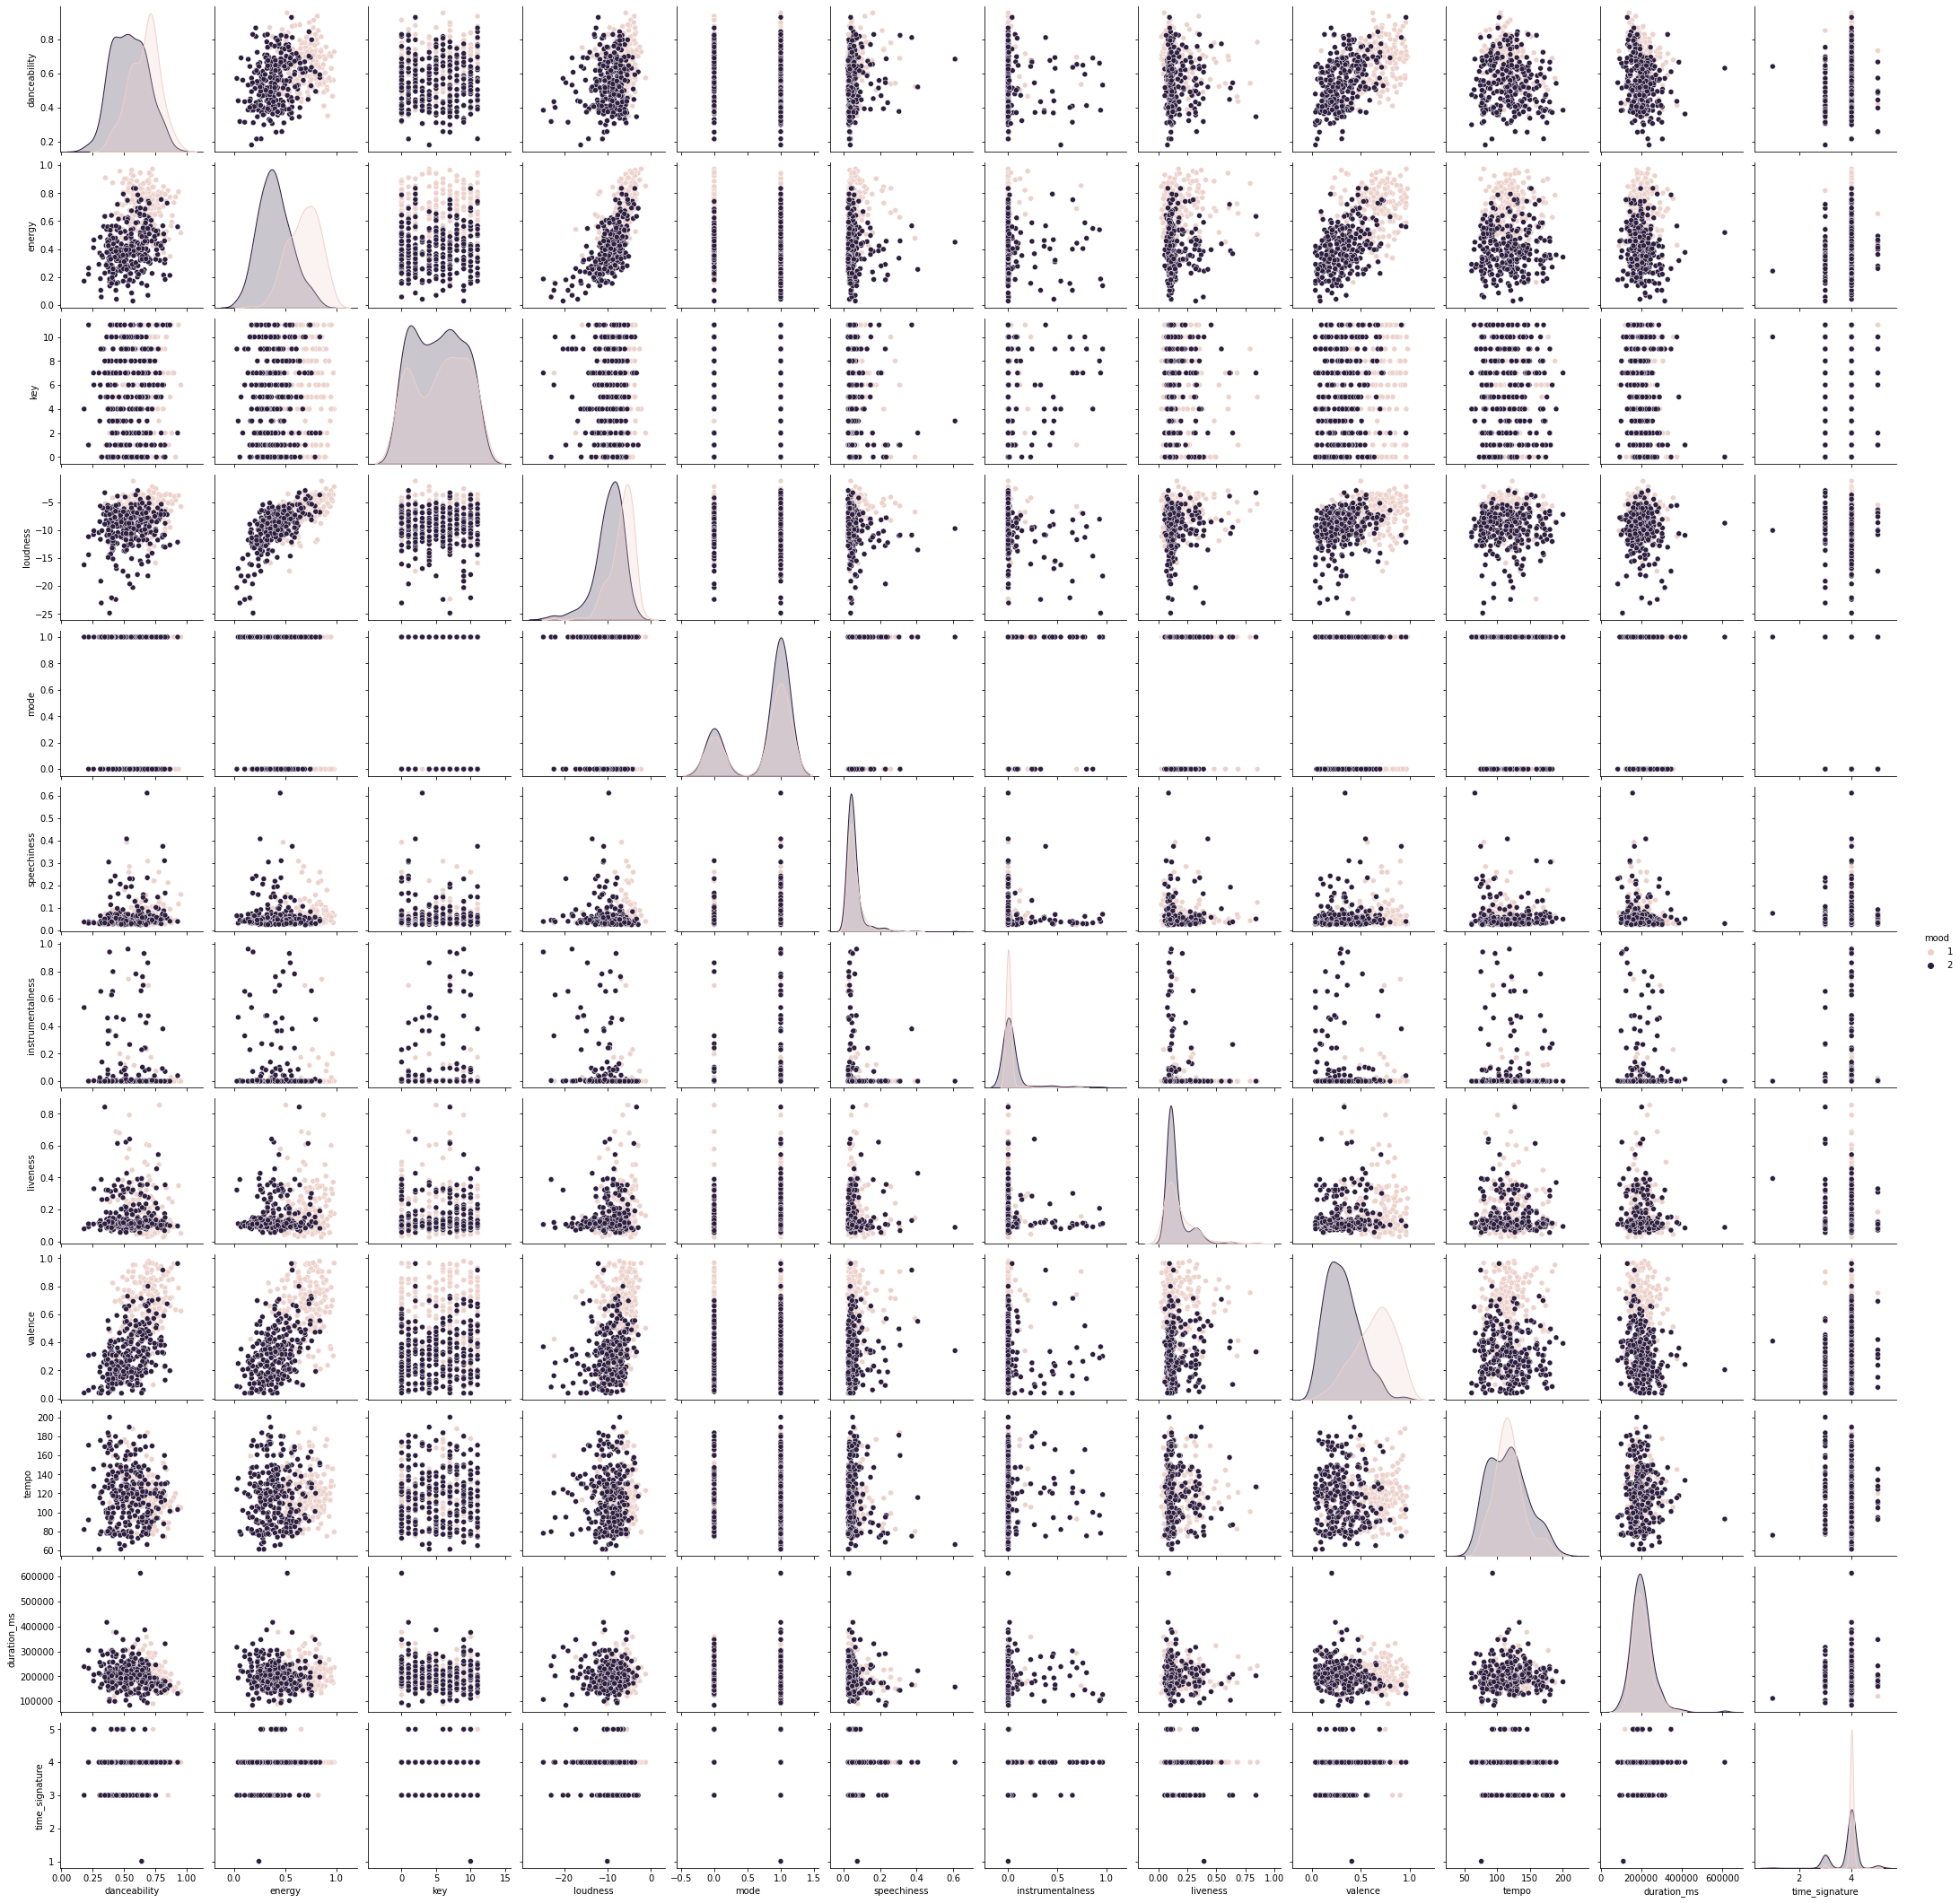

In [25]:
sns.pairplot(df,hue='mood')

# Test Train Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop(['artist','album','track_name','track_id','mood'],axis=1)
y = df['mood']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Decision Tree Classification

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dtree = DecisionTreeClassifier()

In [31]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation

In [32]:
predictions = dtree.predict(X_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.79      0.72      0.75        72
           2       0.75      0.81      0.78        73

    accuracy                           0.77       145
   macro avg       0.77      0.77      0.76       145
weighted avg       0.77      0.77      0.77       145



In [35]:
print(confusion_matrix(y_test,predictions))

[[52 20]
 [14 59]]


## Tree Visualization

In [36]:
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[4:-1])
features

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']

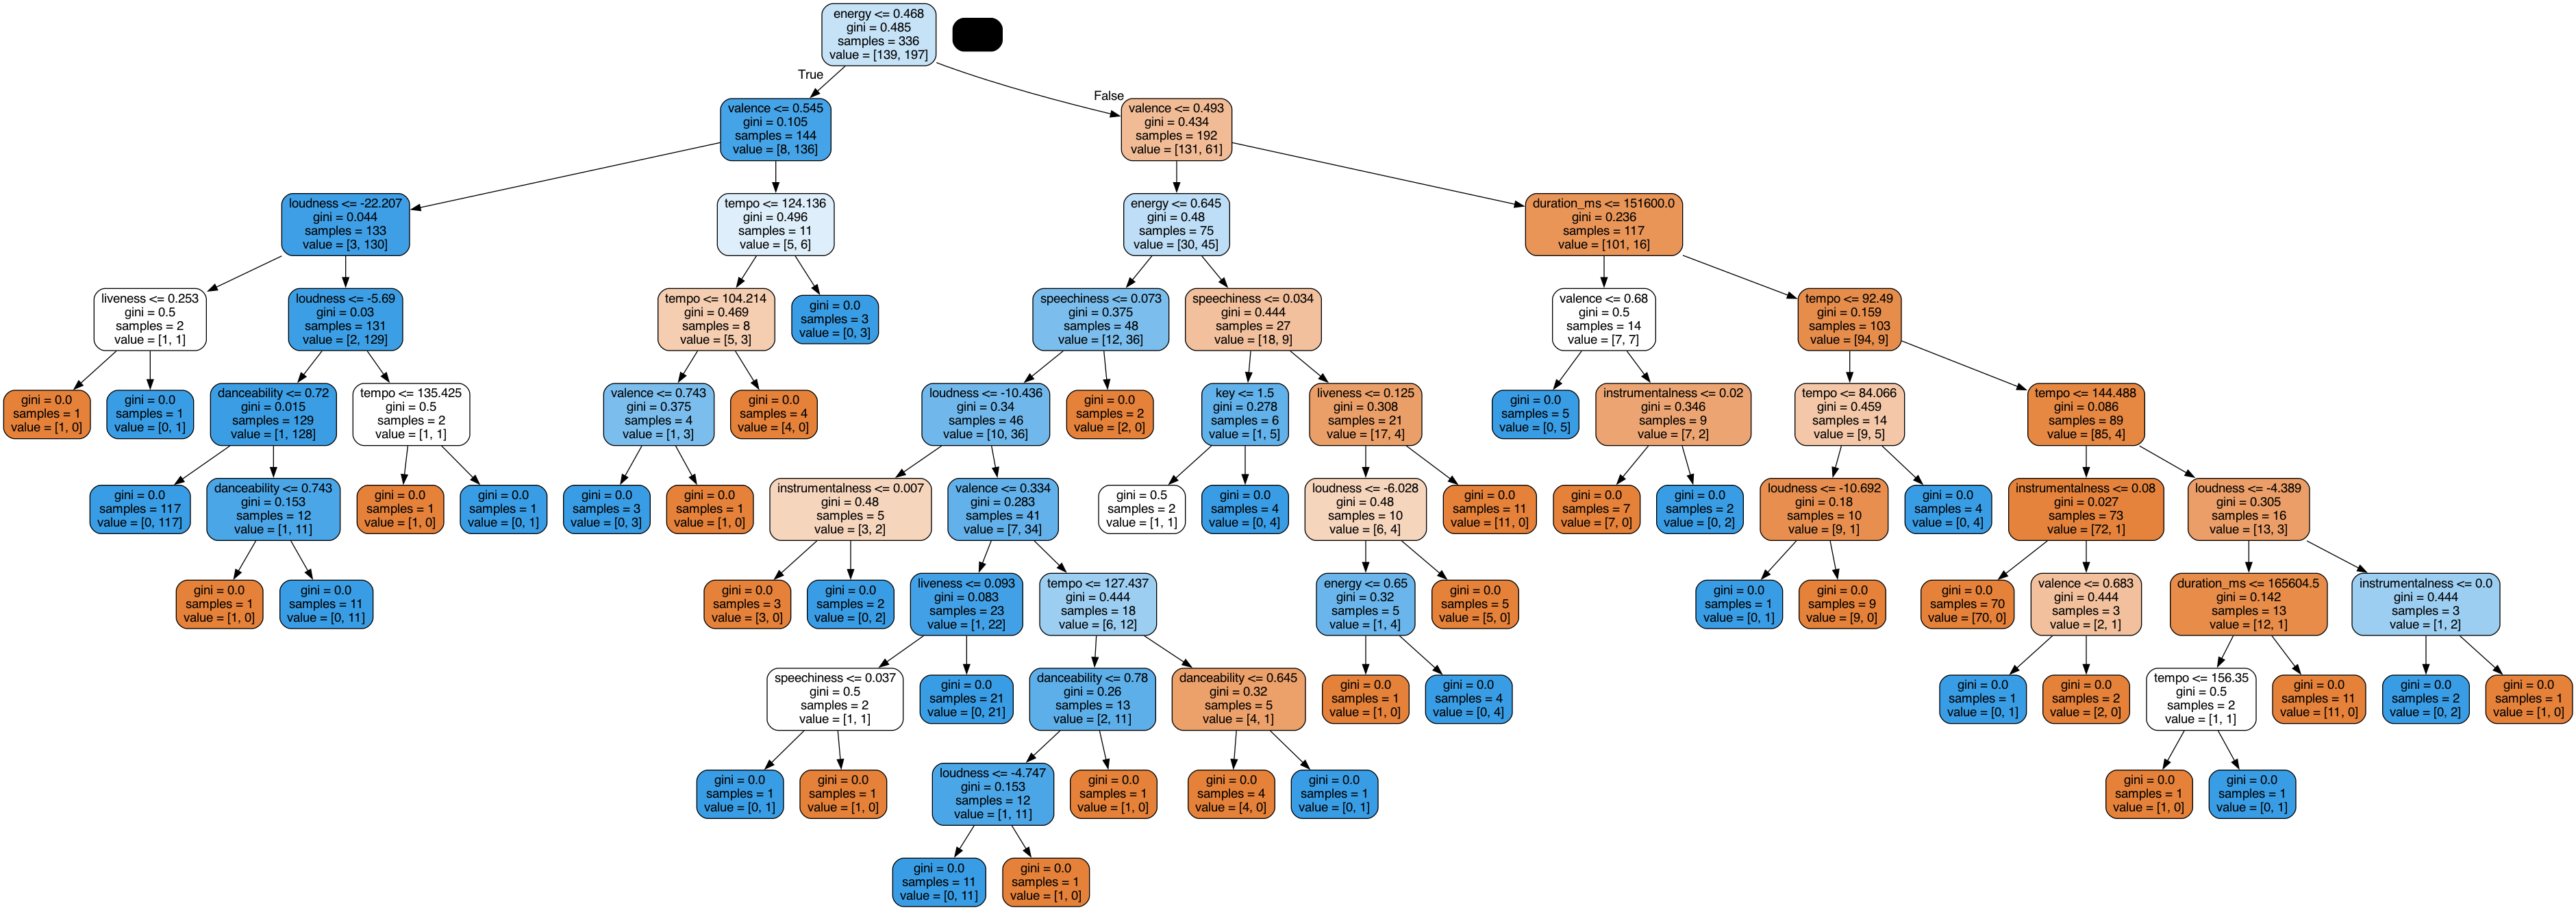

In [37]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

# Random Forest Classification

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfc = RandomForestClassifier(n_estimators=100)

In [40]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

## Predictions and Evaluations

In [41]:
rfc_pred = rfc.predict(X_test)

In [42]:
print(confusion_matrix(y_test,rfc_pred))

[[58 14]
 [ 7 66]]


In [43]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           1       0.89      0.81      0.85        72
           2       0.82      0.90      0.86        73

    accuracy                           0.86       145
   macro avg       0.86      0.85      0.85       145
weighted avg       0.86      0.86      0.85       145



In [44]:
vibes_to_reset.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Mac Ayres,Drive Slow,Easy,58dSdjfEYNSxte1aNVxuNf,0.722,0.282,5,-7.484,1,0.106,0.00557,0.147,0.217,91.367,314358,4
1,Daniel Caesar,Freudian,Best Part (feat. H.E.R.),1RMJOxR6GRPsBHL8qeC2ux,0.524,0.364,7,-10.209,1,0.0367,0,0.1,0.436,75.24,209831,4
2,Bruno Major,A Song For Every Moon,Easily,2k9N4caeCIJLOWwWwssrEM,0.772,0.256,7,-8.545,0,0.0481,0.00612,0.144,0.357,118.902,210240,3
3,keshi,skeletons,skeletons,2BuJrxYKhYky20dQqTlobO,0.719,0.265,2,-12.782,1,0.0754,0.0865,0.108,0.273,80.021,152480,4
4,Kendrick Lamar,DAMN.,LOVE. FEAT. ZACARI.,6PGoSes0D9eUDeeAafB2As,0.8,0.585,10,-7.343,1,0.0924,0,0.153,0.779,126.058,213400,4


In [45]:
X_test.iloc[0]

danceability           0.73
energy                0.487
key                       4
loudness            -10.991
mode                      1
speechiness          0.0303
instrumentalness       0.01
liveness             0.0852
valence               0.731
tempo               114.965
duration_ms          226653
time_signature            4
Name: 90, dtype: object

In [46]:
easily = vibes_to_reset.iloc[2][4:]
easily = easily.values
easily.reshape(1,-1)

array([[0.772, 0.256, 7, -8.545, 0, 0.0481, 0.00612, 0.144, 0.357,
        118.902, 210240, 3]], dtype=object)

In [47]:
rfc.predict([easily])

/Users/matthewlim/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

# GridSearchCV

In [63]:
from sklearn.model_selection import GridSearchCVb

In [69]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])